## Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [421]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [422]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Session- 2, Data Cleaning 

### Segment- 2, Data Types 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set. 

In [423]:
#read the data set of "bank telemarketing campaign" in inp0.
df=pd.read_csv("bank_marketing_updated_v1.csv")


In [424]:
#Print the head of the data frame.
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns 

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [425]:
#read the file in inp0 without first two rows as it is of no use.
inp0=pd.read_csv("bank_marketing_updated_v1.csv", skiprows=2)


In [426]:
#print the head of the data frame.
inp0

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [427]:
#print the information of variables to check their data types.
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [428]:
inp1=inp0

In [429]:
inp1=inp1[~(inp1["age"].isnull())]

In [430]:
inp1.age.isnull().value_counts()

False    45191
Name: age, dtype: int64

In [431]:
#convert the age variable data type from float to integer.
inp1["age"]=inp1["age"].astype("int32")

In [432]:
#print the average age of customers.
inp1["age"].mean()

40.93565090394105

#### Dropping customer id column. 

In [433]:
#drop the customer id as it is of no use.
inp0.drop(columns="customerid")

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories. 

In [434]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']=inp0["jobedu"].apply(lambda x: x.split(",")[0])

In [435]:
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [436]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']= inp0["jobedu"].apply(lambda x: x.split(",")[1])

In [437]:
#drop the "jobedu" column from the dataframe.
inp0.drop(columns="jobedu", inplace=True)

### Segment- 4, Impute/Remove missing values 

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### handling missing values in age column.

In [438]:
#count the missing values in age column.
inp0.age.isnull().sum()

20

In [439]:
#pring the shape of dataframe inp0
inp0.age.shape

(45211,)

In [440]:
#calculate the percentage of missing values in age column.
float((20/45221)*100.0)

0.04422723955684306

Drop the records with age missing. 

In [441]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1=inp0[~inp0["age"].isnull()] 
inp1.age.isnull().sum()

0

#### handling missing values in month column

In [442]:
#count the missing values in month column in inp1.
inp1.month.isnull().sum()

50

In [443]:
#print the percentage of each month in the data frame inp1.
(50/45211)*100

0.11059255490920351

In [444]:
#find the mode of month in inp1
inp1.month.value_counts()

may, 2017    13740
jul, 2017     6885
aug, 2017     6235
jun, 2017     5333
nov, 2017     3967
apr, 2017     2930
feb, 2017     2646
jan, 2017     1402
oct, 2017      737
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [445]:
month_mode=inp1.month.mode()[0]
month_mode

'may, 2017'

In [446]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna(month_mode, inplace=True)

In [447]:
#let's see the null values in the month column.
inp1.month.isnull().sum()

0

#### handling missing values in response column 

In [448]:
#count the missing values in response column in inp1.
inp1.response.isnull().sum()

30

In [449]:
#calculate the percentage of missing values in response column. 
(30/45211)*100.0

0.0663555329455221

Target variable is better of not imputed.
- Drop the records with missing values.

In [450]:
#drop the records with response missings in inp1.
inp1.drop(columns="response", inplace=True)

In [451]:
#calculate the missing values in each column of data frame: inp1.
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45191 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45191 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45191 non-null  int64  
 3   balance     45191 non-null  int64  
 4   marital     45191 non-null  object 
 5   targeted    45191 non-null  object 
 6   default     45191 non-null  object 
 7   housing     45191 non-null  object 
 8   loan        45191 non-null  object 
 9   contact     45191 non-null  object 
 10  day         45191 non-null  int64  
 11  month       45191 non-null  object 
 12  duration    45191 non-null  object 
 13  campaign    45191 non-null  int64  
 14  pdays       45191 non-null  int64  
 15  previous    45191 non-null  int64  
 16  poutcome    45191 non-null  object 
 17  job         45191 non-null  object 
 18  education   45191 non-null  object 
dtypes: float64(1), int64(7), 

#### handling pdays column. 

In [452]:
#describe the pdays column of inp1.
inp1.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [453]:
inp1.loc[inp1.pdays<0,"pdays"]=np.NaN
inp1.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [454]:
#describe the pdays column with considering the -1 values.
inp1.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Segment- 5, Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [455]:
#describe the age variable in inp1.
inp1.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

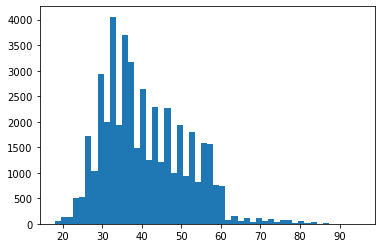

In [456]:
#plot the histogram of age variable.
plt.hist(inp1.age, bins=50)
plt.show()

<AxesSubplot:xlabel='age'>

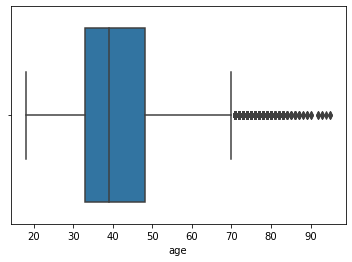

In [457]:
#plot the boxplot of age variable.
sns.boxplot(inp1.age)

#### Salary variable 

In [458]:
#describe the salary variable of inp1.
inp1.salary.describe()

count     45191.000000
mean      57005.974641
std       32084.253154
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

<AxesSubplot:xlabel='salary'>

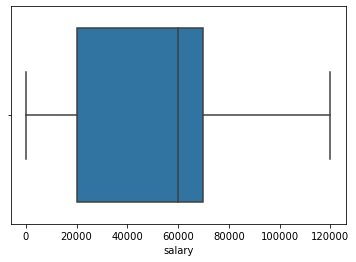

In [459]:
#plot the boxplot of salary variable.
sns.boxplot(inp1.salary)

#### Balance variable 

In [460]:
#describe the balance variable of inp1.
inp1.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<AxesSubplot:xlabel='balance'>

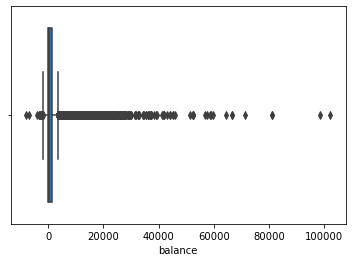

In [461]:
#plot the boxplot of balance variable.
sns.boxplot(inp1.balance)

In [462]:
#plot the boxplot of balance variable after scaling in 8:2.
sns.boxplot

<function seaborn.categorical.boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)>

In [463]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1.balance.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

### Segment- 6, Standardising values 

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [464]:
#describe the duration variable of inp
inp1

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,job,education
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,management,tertiary
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,technician,secondary
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,entrepreneur,secondary
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,blue-collar,unknown
4,5,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,NaN,0,unknown,technician,tertiary
45207,45208,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,NaN,0,unknown,retired,primary
45208,45209,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184.0,3,success,retired,secondary
45209,45210,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,NaN,0,unknown,blue-collar,secondary


In [465]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1.duration=inp1.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

In [466]:
#describe the duration variable
inp1.duration.describe()

count    45191.000000
mean         4.303030
std          4.292739
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status 

In [467]:
#calculate the percentage of each marital status category. 
inp1.marital.value_counts().apply(lambda x: (x/45191)*100)

married     60.197827
single      28.293244
divorced    11.508929
Name: marital, dtype: float64

<AxesSubplot:>

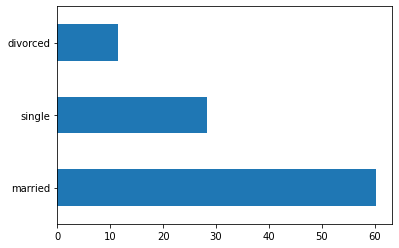

In [468]:
#plot the bar graph of percentage marital status categories
inp1.marital.value_counts().apply(lambda x: (x/45191)*100).plot.barh()

#### Job  

In [469]:
#calculate the percentage of each job status category.
inp1.job.value_counts(normalize=True)

blue-collar      0.215242
management       0.209223
technician       0.168042
admin.           0.114403
services         0.091877
retired          0.050076
self-employed    0.034918
entrepreneur     0.032861
unemployed       0.028811
housemaid        0.027417
student          0.020756
unknown          0.006373
Name: job, dtype: float64

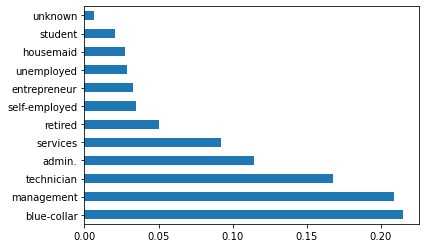

In [470]:
#plot the bar graph of percentage job categories
inp1.job.value_counts(normalize=True).plot.barh()
plt.show()

### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [471]:
#calculate the percentage of each education category.
inp1.education.value_counts(normalize=True)

secondary    0.513222
tertiary     0.294196
primary      0.151490
unknown      0.041092
Name: education, dtype: float64

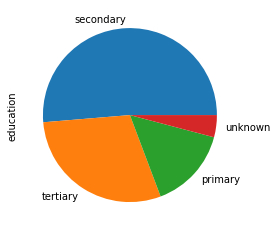

In [472]:
#plot the pie chart of education categories
inp1.education.value_counts(normalize=True).plot.pie()
plt.show()

#### poutcome 

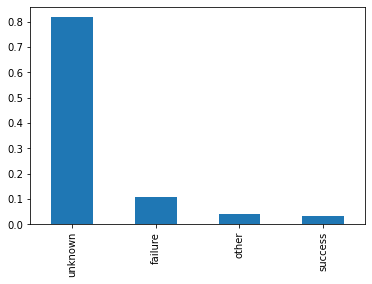

In [473]:
#calculate the percentage of each poutcome category.
inp1.poutcome.value_counts(normalize=True).plot.bar()
plt.show()

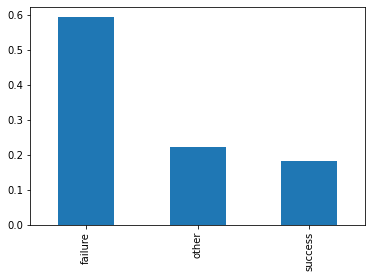

In [474]:
inp1[~(inp1.poutcome=="unknown")].poutcome.value_counts(normalize=True).plot.bar()
plt.show()

#### Response the target variable 

In [475]:
#calculate the percentage of each response category.
inp0.response.value_counts(normalize=True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

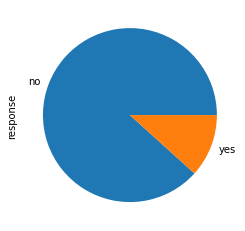

In [476]:
#plot the pie chart of response categories
inp0.response.value_counts(normalize=True).plot.pie()
plt.show()

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

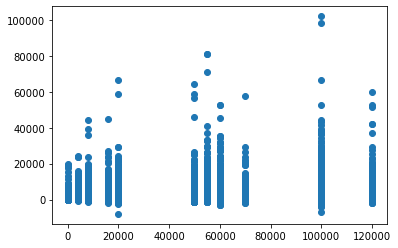

In [477]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(inp0.salary, inp0.balance)
plt.show()

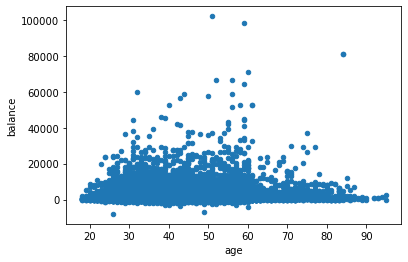

In [478]:
#plot the scatter plot of balance and age variable in inp1
inp0.plot.scatter(x="age", y="balance")
plt.show()

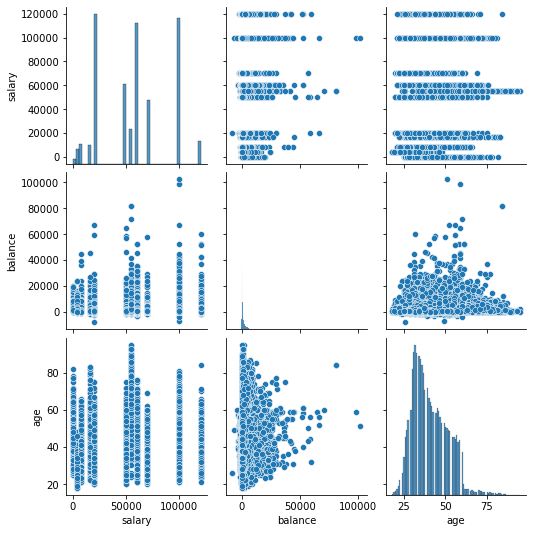

In [479]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=inp1, vars=["salary","balance","age"])
plt.show()

#### Correlation heat map 

In [480]:
inp1.age=inp1.age.astype("int64")

In [481]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
inp1[["age","salary","balance"]].corr()

,age,salary,balance
age,1.000000,0.024374,0.097755
salary,0.024374,1.000000,0.055505
balance,0.097755,0.055505,1.000000


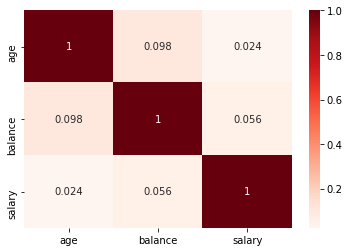

In [482]:
sns.heatmap(inp1[["age","balance","salary"]].corr(), annot=True, cmap="Reds")
plt.show()

### Segment- 4, Numerical categorical variable

#### Salary vs response 

In [483]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp0.groupby(by="response")["salary"].mean()

response
no     56770.917933
yes    58771.704180
Name: salary, dtype: float64

In [484]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp0.groupby(by="response")["salary"].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

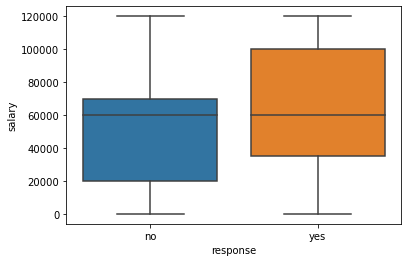

In [485]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=inp0, x="response", y="salary")
plt.show()

#### Balance vs response 

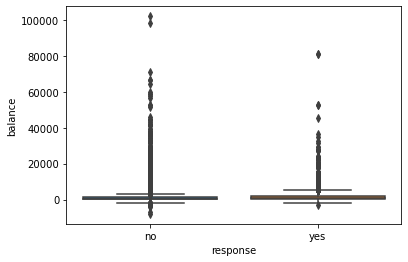

In [486]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=inp0, x="response", y="balance")
plt.show()

In [487]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp0.groupby(by="response")["balance"].mean()

response
no     1304.094525
yes    1804.832041
Name: balance, dtype: float64

In [488]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp0.groupby(by="response")["balance"].median()

response
no     417
yes    733
Name: balance, dtype: int64

##### 75th percentile 

In [489]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [490]:
#calculate the mean, median and 75th percentile of balance with response
inp0.groupby(by="response")["balance"].aggregate(["mean","median",p75])

,mean,median,p75
response,,,
no,1304.094525,417,1345.0
yes,1804.832041,733,2159.5


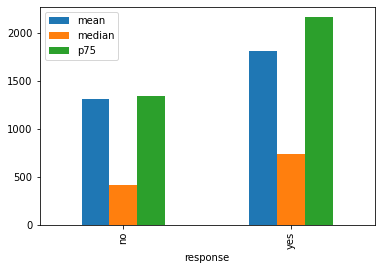

In [491]:
#plot the bar graph of balance's mean an median with response.
inp0.groupby(by="response")["balance"].aggregate(["mean","median",p75]).plot.bar()
plt.show()

#### Education vs salary 

In [492]:
#groupby the education to find the mean of the salary education category.
inp0.groupby("education")["salary"].mean()

education
primary      34212.377755
secondary    49743.815188
tertiary     82873.618525
unknown      46558.427571
Name: salary, dtype: float64

In [493]:
#groupby the education to find the median of the salary for each education category.
inp0.groupby("education")["salary"].median()

education
primary       20000
secondary     55000
tertiary     100000
unknown       50000
Name: salary, dtype: int64

#### Job vs salary

In [494]:
#groupby the job to find the mean of the salary for each job category.
inp0.groupby("job")["salary"].mean()

job
admin.            50000
blue-collar       20000
entrepreneur     120000
housemaid         16000
management       100000
retired           55000
self-employed     60000
services          70000
student            4000
technician        60000
unemployed         8000
unknown               0
Name: salary, dtype: int64

### Segment- 5, Categorical categorical variable 

In [495]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp0["response_flag"]=np.where(inp0.response=="yes",1,0)

In [496]:
inp0.response_flag.value_counts()

0    39924
1     5287
Name: response_flag, dtype: int64

In [497]:
inp0.response.value_counts(normalize=True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

In [498]:
inp0.response_flag.mean()

0.11694056756099179

#### Education vs response rate

In [499]:
#calculate the mean of response_flag with different education categories.
inp0.groupby("education")["response_flag"].mean()

education
primary      0.086265
secondary    0.105551
tertiary     0.149989
unknown      0.135703
Name: response_flag, dtype: float64

#### Marital vs response rate 

In [500]:
#calculate the mean of response_flag with different marital status categories.
inp0.groupby("marital")["response_flag"].mean()

marital
divorced    0.119455
married     0.101198
single      0.149414
Name: response_flag, dtype: float64

<AxesSubplot:ylabel='marital'>

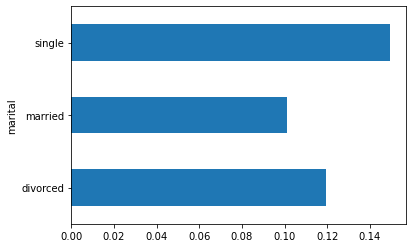

In [501]:
#plot the bar graph of marital status with average value of response_flag
inp0.groupby("marital")["response_flag"].mean().plot.barh()

#### Loans vs response rate 

<AxesSubplot:ylabel='loan'>

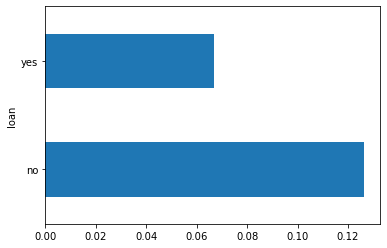

In [502]:
#plot the bar graph of personal loan status with average value of response_flag
inp0.groupby("loan")["response_flag"].mean().plot.barh()

#### Housing loans vs response rate 

<AxesSubplot:ylabel='housing'>

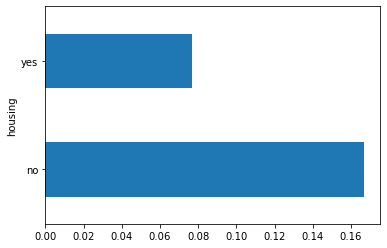

In [503]:
#plot the bar graph of housing loan status with average value of response_flag
inp0.groupby("housing")["response_flag"].mean().plot.barh()

#### Age vs response 

In [504]:
inp1.age.head()

0    58
1    44
2    33
3    47
4    33
Name: age, dtype: int64

<AxesSubplot:xlabel='response', ylabel='age'>

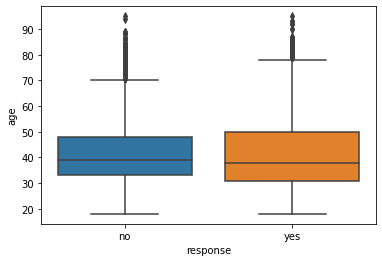

In [505]:
#plot the boxplot of age with response_flag
sns.boxplot(data=inp0, x="response", y="age")

##### making buckets from age columns 

In [506]:
inp1.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,job,education
0,1,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,NaN,0,unknown,management,tertiary
1,2,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,NaN,0,unknown,technician,secondary
2,3,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.266667,1,NaN,0,unknown,entrepreneur,secondary
3,4,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.533333,1,NaN,0,unknown,blue-collar,unknown
4,5,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.300000,1,NaN,0,unknown,unknown,unknown


In [511]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp0["age_group"]=pd.cut(inp0.age, [0,30,40,50,60,999], labels=["<30","30-40","40-50","50-60","60+"])

In [513]:
inp0.age.head()

0    58.0
1    44.0
2    33.0
3    47.0
4    33.0
Name: age, dtype: float64

In [516]:
inp0.age_group.value_counts(normalize=True)

30-40    0.391206
40-50    0.248611
50-60    0.178376
<30      0.155518
60+      0.026288
Name: age_group, dtype: float64

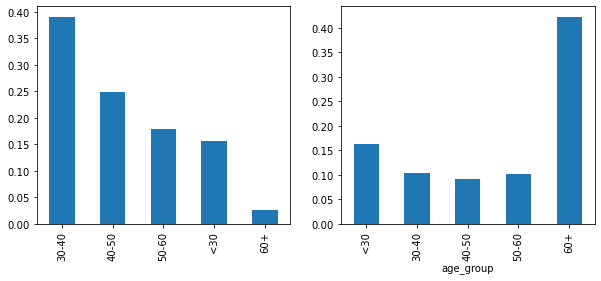

In [518]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp0.age_group.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp0.groupby("age_group")["response_flag"].mean().plot.bar()
plt.show()

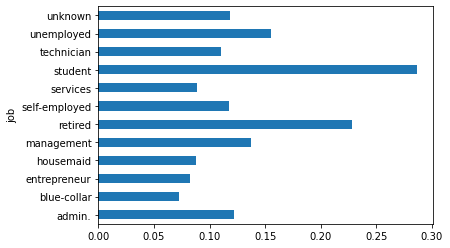

In [520]:
#plot the bar graph of job categories with response_flag mean value.
inp0.groupby("job")["response_flag"].mean().plot.barh()
plt.show()

### Segment-6, Multivariate analysis 

#### Education vs marital vs response 

In [523]:
#create heat map of education vs marital vs response_flag
h1=pd.pivot_table(data=inp0, index="education", columns="marital", values="response_flag")

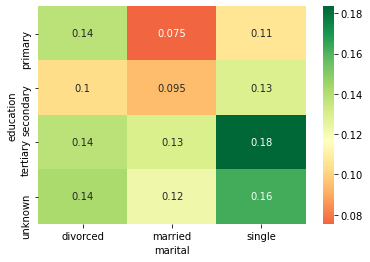

In [529]:
sns.heatmap(h1, annot=True, cmap="RdYlGn", center=0.117)
plt.show()

#### Job vs marital vs response 

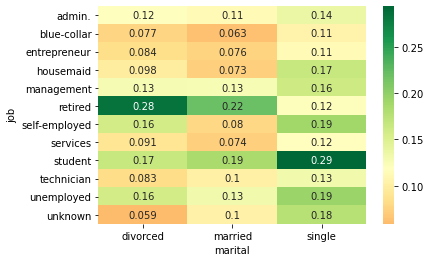

In [535]:
#create the heat map of Job vs marital vs response_flag.
h2=pd.pivot_table(data=inp0, index="job", columns="marital", values="response_flag")
sns.heatmap(h2, annot=True, cmap="RdYlGn", center=0.119)
plt.show()

#### Education vs poutcome vs response

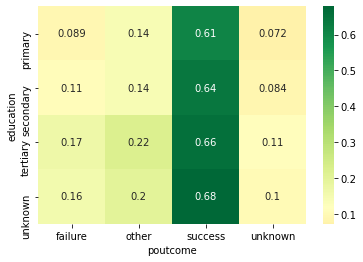

In [536]:
#create the heat map of education vs poutcome vs response_flag.
h3=pd.pivot_table(data=inp0, index="education", columns="poutcome", values="response_flag")
sns.heatmap(h3, annot=True, cmap="RdYlGn", center=0.118)
plt.show()